In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#PATH = 'offense_code.csv'
df = pd.read_csv('offense_code')

In [ ]:
df.head()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,1,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,3,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,4,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,5,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


 ##                                                Preprocessing 

deleting unnecessary columns

In [ ]:
print(df['OFFENSE_CODE_EXTENSION'].unique())
print()
print(df['OFFENSE_TYPE_ID'].unique())
print()
print(df['OFFENSE_TYPE_NAME'].unique())
print()
print(df['OFFENSE_CATEGORY_NAME'].unique())

[1 2 0 3 4 5 6]

['stolen-property-possession' 'fraud-possess-financial-device'
 'damaged-prop-bus' 'criminal-mischief-private' 'criminal-mischief-public'
 'criminal-mischief-other' 'criminal-mischief-mtr-veh'
 'criminal-mischief-graffiti' 'drug-hallucinogen-mfr'
 'drug-hallucinogen-sell' 'drug-hallucinogen-possess' 'drug-heroin-sell'
 'drug-heroin-possess' 'drug-opium-or-deriv-sell'
 'drug-opium-or-deriv-possess' 'drug-cocaine-sell' 'drug-cocaine-possess'
 'drug-synth-narcotic-sell' 'drug-synth-narcotic-possess'
 'drug-poss-paraphernalia' 'drug-marijuana-sell' 'drug-marijuana-possess'
 'drug-marijuana-cultivation' 'drug-methamphetamine-mfr'
 'drug-methampetamine-sell' 'drug-methampetamine-possess'
 'drug-barbiturate-mfr' 'drug-barbiturate-sell' 'drug-barbiturate-possess'
 'drug-pcs-other-drug' 'drug-make-sell-other-drug'
 'sex-aslt-fondle-adult-victim' 'indecent-exposure'
 'sex-off-incest-with-adult' 'window-peeping' 'sex-off-fail-to-register'
 'sex-off-registration-viol' 'indecent-ex

In [ ]:
df = df.drop('OBJECTID', axis=1)
df = df.drop('OFFENSE_CODE', axis=1)
# # df = df.drop('Unnamed: 9', axis=1)

In [ ]:
df.head()

,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


finding unique values in "age" column

In [ ]:
n = len(pd.unique(df['OFFENSE_TYPE_ID']))
print("No.of.unique values :",n)

No.of.unique values : 295


In [ ]:
a = df['OFFENSE_TYPE_ID'].unique()
print(sorted(a))

['accessory-conspiracy-to-crime', 'agg-aslt-gun-other', 'agg-aslt-police-ofc-stng-arm', 'agg-aslt-police-weapon', 'agg-aslt-shoot', 'agg-aslt-strong-arm-dv', 'agg-aslt-strong-arm-nonfam', 'aggravated-assault', 'aggravated-assault-dv', 'altering-vin-number', 'animal-cruelty-to', 'animal-poss-of-dangerous', 'arson-business', 'arson-other', 'arson-public-building', 'arson-residence', 'arson-vehicle', 'aslt-agg-family-gun', 'aslt-agg-family-weapon', 'aslt-agg-non-family-gun', 'aslt-agg-non-family-weapon', 'aslt-agg-police-gun', 'assault-dv', 'assault-police-simple', 'assault-simple', 'assault-state', 'bigamy', 'bomb-threat', 'bribery', 'burg-auto-theft-busn-no-force', 'burg-auto-theft-busn-w-force', 'burg-auto-theft-resd-no-force', 'burg-auto-theft-resd-w-force', 'burglary-business-by-force', 'burglary-business-no-force', 'burglary-other', 'burglary-poss-of-tools', 'burglary-residence-by-force', 'burglary-residence-no-force', 'burglary-safe', 'burglary-vending-machine', 'contraband-into-pr

In [ ]:
df.head()

,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [ ]:
print (df.dtypes)

OFFENSE_CODE_EXTENSION     int64
OFFENSE_TYPE_ID           object
OFFENSE_TYPE_NAME         object
OFFENSE_CATEGORY_ID       object
OFFENSE_CATEGORY_NAME     object
IS_CRIME                   int64
IS_TRAFFIC                 int64
dtype: object


In [ ]:
n = len(pd.unique(df['OFFENSE_CATEGORY_ID']))
print("No.of.unique values :",n)

print()

a = df['OFFENSE_CATEGORY_ID'].unique()
print(sorted(a))

No.of.unique values : 15

['aggravated-assault', 'all-other-crimes', 'arson', 'auto-theft', 'burglary', 'drug-alcohol', 'larceny', 'murder', 'other-crimes-against-persons', 'public-disorder', 'robbery', 'sexual-assault', 'theft-from-motor-vehicle', 'traffic-accident', 'white-collar-crime']


In [ ]:
n = len(pd.unique(df['OFFENSE_CATEGORY_NAME']))
print("No.of.unique values :",n)

print()

a = df['OFFENSE_CATEGORY_NAME'].unique()
print(sorted(a))

No.of.unique values : 15

['Aggravated Assault', 'All Other Crimes', 'Arson', 'Auto Theft', 'Burglary', 'Drug & Alcohol', 'Larceny', 'Murder', 'Other Crimes Against Persons', 'Public Disorder', 'Robbery', 'Sexual Assault', 'Theft from Motor Vehicle', 'Traffic Accident', 'White Collar Crime']


In [ ]:
df = df.drop('IS_CRIME', axis=1)
df = df.drop('IS_TRAFFIC', axis=1)
# df = df.drop('are_there_teachers_at_scheduled_class_hours', axis=1)


In [ ]:
print (df.dtypes)

OFFENSE_CODE_EXTENSION     int64
OFFENSE_TYPE_ID           object
OFFENSE_TYPE_NAME         object
OFFENSE_CATEGORY_ID       object
OFFENSE_CATEGORY_NAME     object
dtype: object


In [ ]:
final_data = pd.get_dummies(df, drop_first = True)

In [ ]:
final_data.head()

,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID_agg-aslt-gun-other,OFFENSE_TYPE_ID_agg-aslt-police-ofc-stng-arm,OFFENSE_TYPE_ID_agg-aslt-police-weapon,OFFENSE_TYPE_ID_agg-aslt-shoot,OFFENSE_TYPE_ID_agg-aslt-strong-arm-dv,OFFENSE_TYPE_ID_agg-aslt-strong-arm-nonfam,OFFENSE_TYPE_ID_aggravated-assault,OFFENSE_TYPE_ID_aggravated-assault-dv,OFFENSE_TYPE_ID_altering-vin-number,...,OFFENSE_CATEGORY_NAME_Drug & Alcohol,OFFENSE_CATEGORY_NAME_Larceny,OFFENSE_CATEGORY_NAME_Murder,OFFENSE_CATEGORY_NAME_Other Crimes Against Persons,OFFENSE_CATEGORY_NAME_Public Disorder,OFFENSE_CATEGORY_NAME_Robbery,OFFENSE_CATEGORY_NAME_Sexual Assault,OFFENSE_CATEGORY_NAME_Theft from Motor Vehicle,OFFENSE_CATEGORY_NAME_Traffic Accident,OFFENSE_CATEGORY_NAME_White Collar Crime
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
n = len(pd.unique(df['OFFENSE_CODE_EXTENSION']))
print("No.of.unique values :",n)


No.of.unique values : 7


##  DATA VISUALIZATION

## Pair Plot

In [ ]:
df.head()
from sklearn.preprocessing import LabelEncoder

In [ ]:
nonlabled_df=df.copy()

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['OFFENSE_CODE_EXTENSION']= label_encoder.fit_transform(df['OFFENSE_CODE_EXTENSION']) 
print(df.head())

   OFFENSE_CODE_EXTENSION                 OFFENSE_TYPE_ID  \
0                       1      stolen-property-possession   
1                       2  fraud-possess-financial-device   
2                       0                damaged-prop-bus   
3                       0       criminal-mischief-private   
4                       0        criminal-mischief-public   

                       OFFENSE_TYPE_NAME OFFENSE_CATEGORY_ID  \
0          Possession of stolen property    all-other-crimes   
1       Possession of a financial device    all-other-crimes   
2              Damaged business property     public-disorder   
3  Criminal mischief to private property     public-disorder   
4   Criminal mischief to public property     public-disorder   

  OFFENSE_CATEGORY_NAME  
0      All Other Crimes  
1      All Other Crimes  
2       Public Disorder  
3       Public Disorder  
4       Public Disorder  


In [ ]:
df['OFFENSE_TYPE_ID']= label_encoder.fit_transform(df['OFFENSE_TYPE_ID']) 
df['OFFENSE_TYPE_NAME']= label_encoder.fit_transform(df['OFFENSE_TYPE_NAME']) 
df['OFFENSE_CATEGORY_ID']= label_encoder.fit_transform(df['OFFENSE_CATEGORY_ID']) 
df['OFFENSE_CATEGORY_NAME']= label_encoder.fit_transform(df['OFFENSE_CATEGORY_NAME']) 

In [ ]:
df.head()

,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME
0,1,237,191,1,1
1,2,112,168,1,1
2,0,51,59,9,9
3,0,47,53,9,9
4,0,48,54,9,9


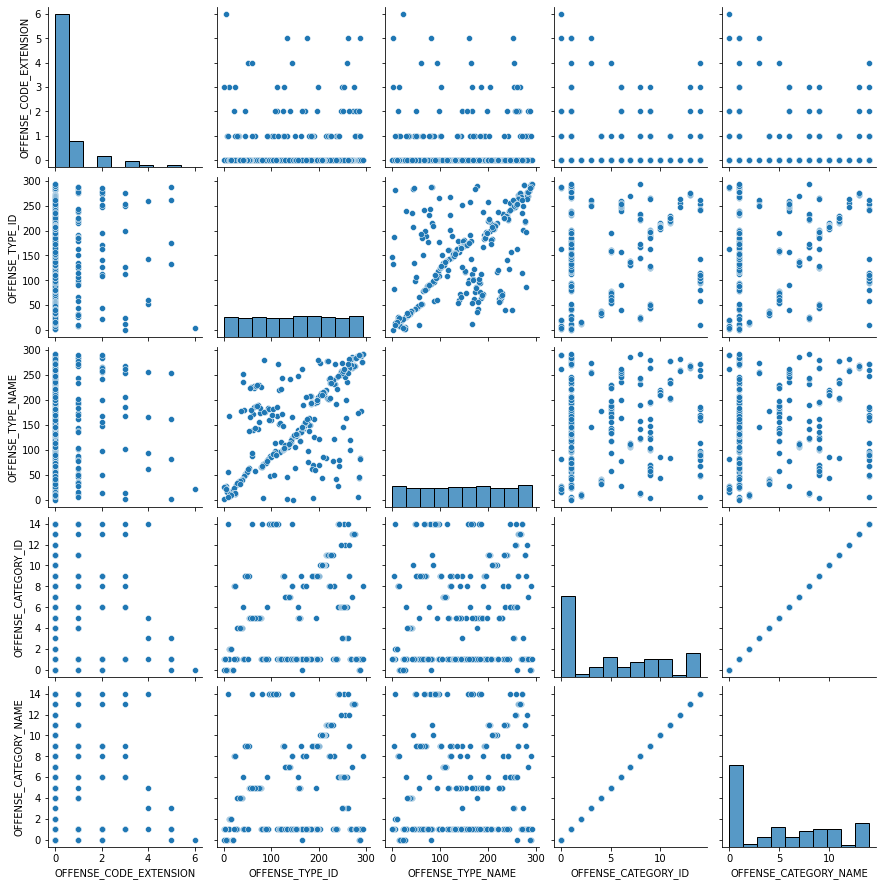

In [ ]:
sns.pairplot(df)

## Heat Map

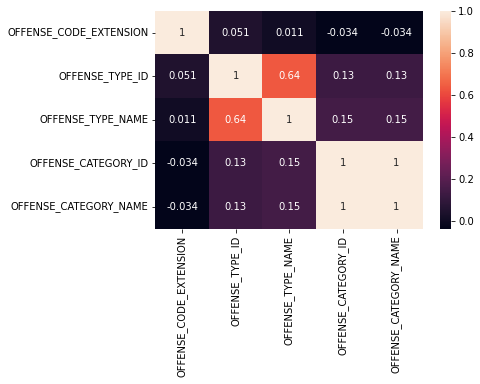

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
nonlabled_df.head()

,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME
0,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes
1,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes
2,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder
3,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder
4,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder


In [ ]:
nonlabled_df['OFFENSE_CATEGORY_ID'].unique()

array(['all-other-crimes', 'public-disorder', 'drug-alcohol',
       'sexual-assault', 'other-crimes-against-persons',
       'white-collar-crime', 'traffic-accident', 'murder', 'robbery',
       'aggravated-assault', 'arson', 'burglary', 'larceny',
       'theft-from-motor-vehicle', 'auto-theft'], dtype=object)